In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [36]:
df=pd.read_csv(r'garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

# Data Cleansing

In [38]:
#ubah type data
df['date']=pd.to_datetime(df['date'])
#handling extra space
df['department']=df['department'].str.strip()
#handling kesalahan penulisan
df['department']=df['department'].replace('sweing','sewing')

In [39]:
print('wip',506/1197)

wip 0.4227234753550543


In [40]:
# cek missing value
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

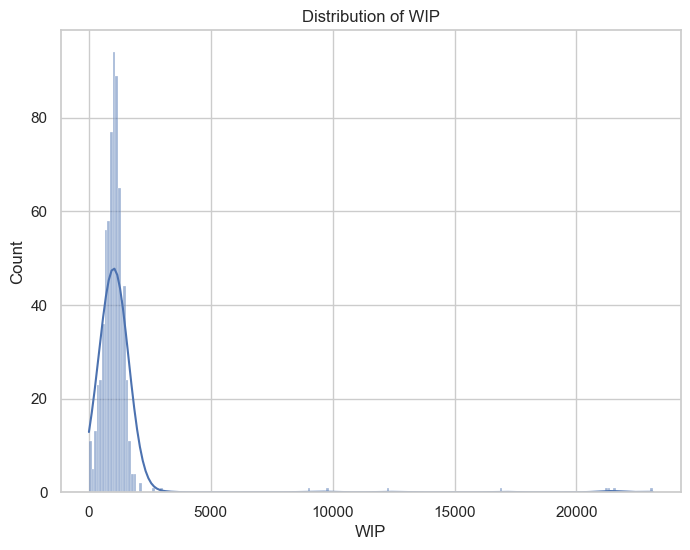

In [41]:
#distribusi wip
plt.figure(figsize=(8,6))
sns.histplot(df['wip'],kde=True)
plt.title('Distribution of WIP')
plt.xlabel('WIP')
plt.show()

In [42]:
#handling missing value
df['wip'].fillna(df['wip'].median(),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19840\1826739014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df['wip'].median(),inplace=True)


In [43]:
# Feature baru untuk Target
df['productivity_status']=(df['actual_productivity']>=df['targeted_productivity']).astype(int)

df=df.drop(columns=['actual_productivity','targeted_productivity'])

In [44]:
#cek duplicate
df.duplicated().sum()

0

# Exploratory Data Analays

In [45]:
categoricals=['quarter','department','day']
numericals=['team','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','productivity_status']
df[numericals].describe()

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_status
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,15.062172,1126.437761,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.730994
std,3.463963,10.943219,1397.653191,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.443628
min,1.000000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,3.000000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
50%,6.000000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1.000000
75%,9.000000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,1.000000
max,12.000000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.000000


In [46]:
df[categoricals].describe()

,quarter,department,day
count,1197,1197,1197
unique,5,2,6
top,Quarter1,sewing,Wednesday
freq,360,691,208


observasi:
- Paling banyak di Quarter 1, Department sewing, hari Rabu

<Axes: >

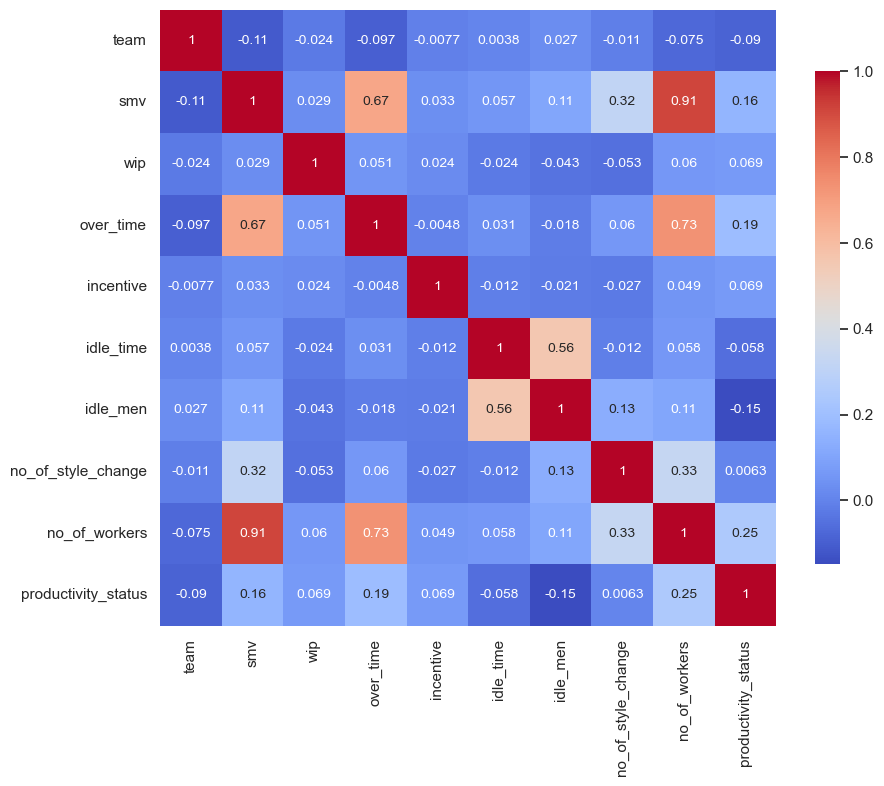

In [47]:
correlation=df[numericals].corr()
# Membuat heatmap
plt.figure(figsize=(10,8))

sns.heatmap(correlation, annot=True, annot_kws={"size": 10}, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})


- no_of_workers
- over_time
- smv
- idle_men (-)

## pengaruh productivity terhadap jumlah pekerja

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19840\1451258121.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productivity_count=df.groupby(['worker_group','productivity_status']).size().unstack()


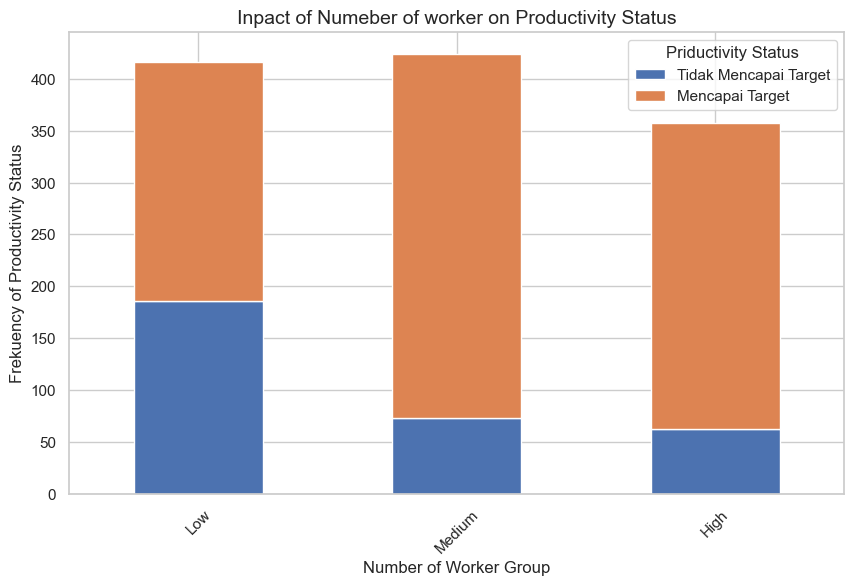

In [48]:
#pengaruh productivity terhadap jumlah pekerja
df['worker_group']=pd.qcut(df['no_of_workers'],q=3,labels=['Low','Medium','High'])

productivity_count=df.groupby(['worker_group','productivity_status']).size().unstack()

fig,ax=plt.subplots(figsize=(10,6))
productivity_count.plot(kind='bar',stacked=True,ax=ax)
plt.title('Inpact of Numeber of worker on Productivity Status',fontsize=14)
plt.xlabel('Number of Worker Group',fontsize=12)
plt.ylabel('Frekuency of Productivity Status',fontsize=12)
plt.legend(title='Priductivity Status',labels=['Tidak Mencapai Target','Mencapai Target'])
plt.xticks(rotation=45)
plt.show()

Observasi:
- Kelompok dengan jumlah pekerja medium lebih banyak yang mencapai target
- jika dibandingkan dengan semua grup, kelompok dengan jumlah pekerja lebih banyak paling sedikit yang tidak mencapai target
- Kelompok dengan jumlah pekerja sedikit paling banyak yang tidak mencapai target.

In [50]:
#Uji Chi-Square
from scipy.stats import chi2_contingency

low_team=df[df['worker_group']=='Tim low'][]

Chi-square Test p-value=4.5799394920915525e-23


Observasi:
- Ada hubungan signifikan anatara grup jumlah pekerja dan produktivitas

## Pengaruh Overtime terhadap productivity

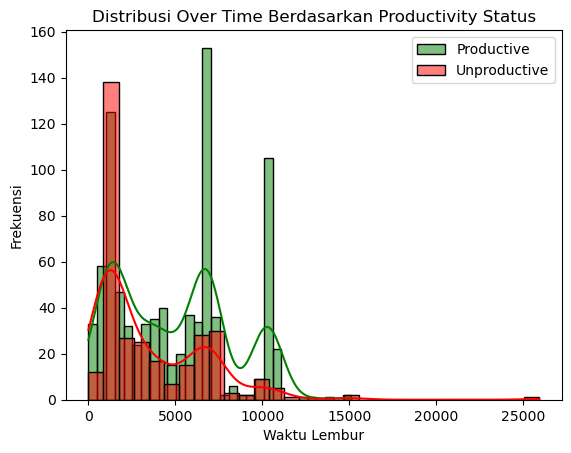

In [25]:
productive=df[df['productivity_status']==1]
unproductive=df[df['productivity_status']==0]
#Histogram untuk tim productive
sns.histplot(productive['over_time'],color='green',kde=True, label='Productive',bins=30)
#histogram untuk tim tdk productive
sns.histplot(unproductive['over_time'],color='red',kde=True, label='Unproductive',bins=30)

plt.title('Distribusi Over Time Berdasarkan Productivity Status')
plt.xlabel('Waktu Lembur')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

- Sebagian besar waktu lembur meningkatkan produktivitas terutama pada lembur rendah hingga 5000 menit.
- waktu lembur yang tinggi tidak menjamin peningkatan produktivitas

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19840\1043991541.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='productivity_status',y='idle_time',data=df,palette='coolwarm',ci=None)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19840\1043991541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='productivity_status',y='idle_time',data=df,palette='coolwarm',ci=None)


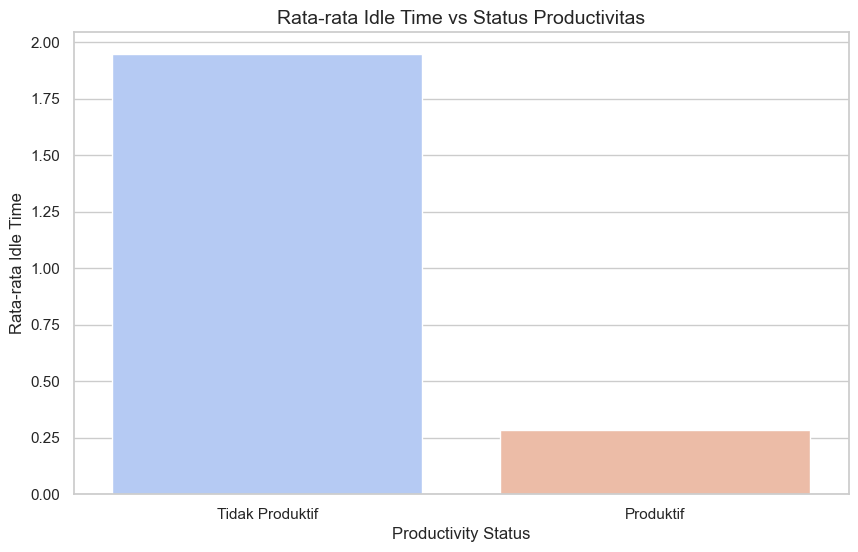

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19840\1043991541.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='productivity_status',y='idle_men',palette='coolwarm',data=df,ci=None)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19840\1043991541.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='productivity_status',y='idle_men',palette='coolwarm',data=df,ci=None)


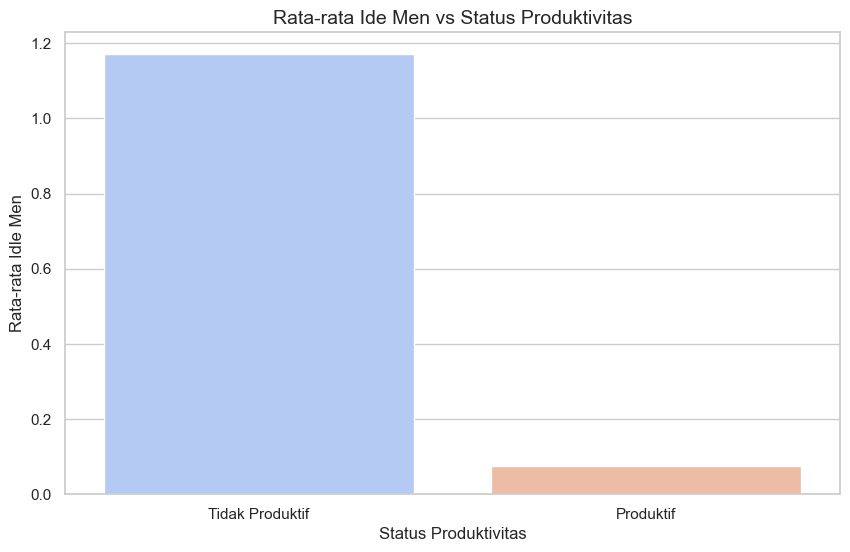

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='productivity_status',y='idle_time',data=df,palette='coolwarm',ci=None)
plt.title('Rata-rata Idle Time vs Status Productivitas',fontsize=14)
plt.xlabel('Productivity Status',fontsize=12)
plt.ylabel('Rata-rata Idle Time', fontsize=12)
plt.xticks([0,1],['Tidak Produktif','Produktif'])
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='productivity_status',y='idle_men',palette='coolwarm',data=df,ci=None)
plt.title('Rata-rata Ide Men vs Status Produktivitas',fontsize=14)
plt.xlabel('Status Produktivitas',fontsize=12)
plt.ylabel('Rata-rata Idle Men',fontsize=12)
plt.xticks([0,1],['Tidak Produktif','Produktif'])
plt.show()

Observasi:
- Pekerja yang tidak produktif memiliki rata-rata idle time yang jauh lebih tinggi dibandingkan pekerja yang produktif
-  Idle time yang tinggi secara signifikan mengurangi kemungkinan pekerja mencapai status produktif.
- Idle men yang tinggi secara signifikan mengurangi kemungkinan pekerja mencapai status produktif.

# Feature Enginering